# Cheatsheet

# 3.2 Seven Important Functions

1. The Constant Function
    $$f(n) = c$$
2. The Logarithm Function
    $$f(n) = \log_b n$$
3. The Linear Function
    $$f(n) = n$$
4. The N-Log-N Function
    $$f(n) = n \log n$$
5. The Quadratic Function
    $$f(n) = n^2$$
6. The Cubic Function and Other Polynomials
    $$f(n) = n^3$$
    $$f(n) = a_0 + a_1n + a_2n^2 + a_3n^3 + \cdots + a_dn^d$$    
7. The Exponential Function
    $$f(n) = b^n$$
    
    
# 3.3 Asymptotic Analysis

## 3.3.1 The "Big-Oh" Notation
$$f(n) \leq cg(n)\text{,}\quad\text{for }n \geq n_0$$

### Exercises (=find the suitable $c$ and $n_0$ for each case)
1. Justify $5n^2 + 3n\log n + 2n + 5$ is $O(n^2)$.
1. Justify $20n^3 + 10n\log n + 5$ is $O(n^3)$.
1. Justify $3 \log n + 2$ is $O(\log n)$.
1. Justify $2^{n+2}$ is $O(2^n)$.
1. Justify $2n + 100 \log n$ is $O(n)$.

## 3.3.2 Comparative Analysis
The seven functions are ordered by increasing growth rate in following sequence:
$$ 1 \quad<\quad \log n \quad<\quad n \quad<\quad n\log n \quad<\quad n^2 \quad<\quad n^3 \quad<\quad 2^n$$

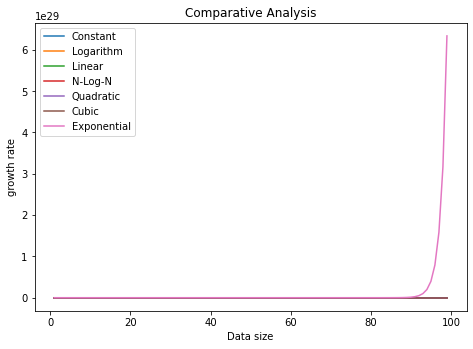

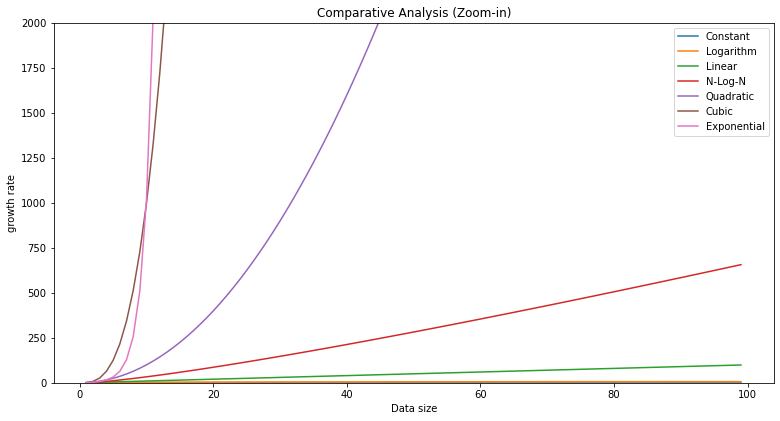

In [1]:
import matplotlib as plt
import math

size = []
const = []
logn = []
n = []
nlogn = []
nquad = []
ncub = []
exp = []

for i in range(1,100):
    size.append(i)
    const.append(1)
    logn.append(math.log(i,2))
    n.append(i)
    nlogn.append(i*math.log(i,2))
    nquad.append(i**2)
    ncub.append(i**3)
    exp.append(2**i)
    
import matplotlib.pyplot as plt

fig = plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.set_xlabel('Data size')
ax.set_ylabel('growth rate')
ax.set_title('Comparative Analysis')
plt.plot(size, const, label='Constant')
plt.plot(size, logn, label='Logarithm')
plt.plot(size, n, label='Linear')
plt.plot(size, nlogn, label='N-Log-N')
plt.plot(size, nquad, label='Quadratic')
plt.plot(size, ncub, label='Cubic')
plt.plot(size, exp, label='Exponential')
plt.legend()
plt.show()

fig = plt.figure(figsize=(10,5))
ax=fig.add_axes([0,0,1,1])
ax.set_xlabel('Data size')
ax.set_ylabel('growth rate')
ax.set_ylim([0,2000])
ax.set_title('Comparative Analysis (Zoom-in)')
plt.plot(size, const, label='Constant')
plt.plot(size, logn, label='Logarithm')
plt.plot(size, n, label='Linear')
plt.plot(size, nlogn, label='N-Log-N')
plt.plot(size, nquad, label='Quadratic')
plt.plot(size, ncub, label='Cubic')
plt.plot(size, exp, label='Exponential')
plt.legend()
plt.show()

### What makes a better algorithm?
Supposee two algorithms solving the same problem are available: an algorithm $A$, which has a running time of $O(n)$, and an algorithm $B$, which has a running time of $O(n^2)$. Which algorithm is better? We know that $n$ is $O(n^2)$, which implies that algorithm $A$ is **asymptotically better** than algorithm $B$, although for a small value of $n$, $B$ may have a lower running time than A.

#### CAUTION!
In general, a lower-order algorithm is faster than a higher-order algorithm. However, be aware about the hiding VERY LARGE low-order terms.

For example, let's consider comparing those two functions:

$$\text{Algorithm A's Running Time} = 10^{100}$$
$$\text{Algorithm B's Running Time} = 3n\log(n)+5n$$

Even though the Algorithm A is $O(1)$, which is constant, and the algorithm B is $O(n\log n)$, Algorithm B may be better. For a problem size less than a million, Algorithm B takes less than a billion running time, while the Algorithm A takes **one googol** time to run it.

In [2]:
# The running time of problem B, at 10k problem size:
n=1000000
print(3*n*math.log(n,2)+5*n)

64794705.70797252


Therefore, be aware your context!

However, still, an exponential algorithm is almost never good.

## 3.3.3 Example Analysis
### A general procedure for an algorithm analysis
1. Identify primitive operations (formally, a low-level instruction running on a processing unit), for example:
```python
a = 3        # Assigning an identifier
b = a        # Determining the object associated with an identifier
3+5          # Arithmetic operation
if (6 < a):  # Comparing two numbers
elem[522]    # Accessing a single element of a Python list by index
your_func()  # Calling a function (excluding the operations within the function)
return b     # Returning from a function
```
1. Write down the pseudo-code.
1. Identify what is the input of the algorithm, call its size as $n$.
1. Focus on the Worst-Case Input.
1. Count the number of executions of the primitive operations.

1. Express the function with Big-Oh notation, saying **this algorithm** runs in $O(n)$, or whatever, time.

### Some Rule-Of-Thumb
#### The Constant Function: $f(n) = c$
Any primitive operations outside a loop runs in constant time.
    
#### The Logarithm Function: $f(n) = \log_b n$
Some special case of iteration runs in logarithm time, for example, searching for an item within a sorted list.

#### The Linear Function: $f(n) = n$
In general, scan thorough a list (=regualr for-loop) runs in linear time.

#### The N-Log-N Function: $f(n) = n \log n$
When combining some harmonic-number operations within a loop iterates over the entire item, it runs in N-Log-N time.

#### The Quadratic Function: $f(n) = n^2$, Cubic Function:$f(n) = n^3$, and Other Polynomials: $f(n) = a_0 + a_1n + a_2n^2 + a_3n^3 + \cdots + a_dn^d$
Nested loops runs in quadratic, cubic, and polynomial times, depend on the number of the loops and iterations.

#### The Exponential Function: $f(n) = b^n$
When searching for the every possible combinations of a set, it runs in exponential time.
For example, searching for an unknown password.

## Prefix Averages
Prefix average $A[j]$ = *the average of the first J items in the list S*, defined as:
$$A[j]=\frac{\sum^j_{i=0}s[i]}{j+1}$$

### prefix_average1 (Quadratic)

In [3]:
def prefix_average1(S):
    # Return list such that, for all j, A[j] equals average of S[0], ..., S[j].
    n = len(S)
    A = [0] * n
    for j in range(n):
        total = 0
        for i in range(j + 1):
            total += S[i]
        A[j] = total / (j+1)
    return A


# Execution DEMO
import random
list_S = random.sample(range(0,100), 5)
print(list_S)

AVG1 = prefix_average1(list_S)
print(AVG1)

[0, 29, 28, 89, 68]
[0.0, 14.5, 19.0, 36.5, 42.8]


### prefix_average2 (Quadratic)

In [4]:
def prefix_average2(S):
    # Return list such that, for all j, A[j] equals average of S[0], ..., S[j].
    n = len(S)
    A = [0] * n
    for j in range(n):
        A[j] = sum(S[0:j+1]) / (j+1)
    return A

# Execution DEMO
print(list_S)

AVG2 = prefix_average2(list_S)
print(AVG2)

[0, 29, 28, 89, 68]
[0.0, 14.5, 19.0, 36.5, 42.8]


#### Execution Time Analysis

```python
def prefix_average1(S):
    # Return list such that, for all j, A[j] equals average of S[0], ..., S[j].
    n = len(S)                    # 1
    A = [0] * n                   # n
    for j in range(n):            # n
        total = 0                   # n * 1
        for i in range(j + 1):      # 1+2+3+4+..+n = n(n+1)/2 => O(n^2)
            total += S[i]             # n(n+1)/2
        A[j] = total / (j+1)        # n
    return A
```
$\sum = O(n^2)$

```python
def prefix_average2(S):
    # Return list such that, for all j, A[j] equals average of S[0], ..., S[j].
    n = len(S)                    # 1
    A = [0] * n                   # n
    for j in range(n):            # n
        A[j] = sum(S[0:j+1]) / (j+1)  # n * sum() = 1+2+3+... +n = n(n+1)/2 => O(n^2)
    return A
```
$\sum = O(n^2)$

### prefix_average3 (Linear)

In [5]:
def prefix_average3(S):
    # Return list such that, for all j, A[j] equals average of S[0], ..., S[j].
    n = len(S)
    A = [0] * n
    total = 0
    for j in range(n):
        total += S[j]
        A[j] = total / (j+1)
    return A

# Execution DEMO
print(list_S)

AVG3 = prefix_average3(list_S)
print(AVG3)

[0, 29, 28, 89, 68]
[0.0, 14.5, 19.0, 36.5, 42.8]


#### Execution Time Analysis

```python
def prefix_average3(S):
    # Return list such that, for all j, A[j] equals average of S[0], ..., S[j].
    n = len(S)                    # 1
    A = [0] * n                   # n
    total = 0                     # 1
    for j in range(n):            # n
        total += S[j]             # n * 1
        A[j] = total / (j+1)      # n * 1
    return A
```
$\sum = O(n)$

# Exercise

## Three-Way Set Disjointness
Suppose we are given three sequences of numbers, $A, B$ and $C$. We will assume that no individual sequence contains duplicate values, but that there may be some numbers that are in two or three of the sequences.
The **three-way set disjointness** problem is to determine if the intersection of the three sequences is empty, namely, that there is no element $x$ such that $x \in A, x \in B$ and $x \in C$.

```python
def disjoint1(A, B, D):
    for a in A:
        for b in B:
            for c in C:
                if a == b == c:
                    return False
    return True
```

```python
def disjoint2(A, B, D):
    for a in A:
        for b in B:
            if a == b:
                for c in C:
                    if a == c:
                        return False
    return True
```

***==> Task 1: Explain the working principles of ``disjoint1`` and ``disjoint2`` algorithms.***

***==> Task 2: Analyze the algorithm running time and express it using Big-Oh notation.***

In [6]:
# DEMO
def disjoint1(A, B, C):
    for a in A:
        for b in B:
            for c in C:
                if a == b == c:
                    return False
    return True

def disjoint2(A, B, C):
    for a in A:
        for b in B:
            if a == b:
                for c in C:
                    if a == c:
                        return False
    return True

A = random.sample(range(0,10), 5)
B = random.sample(range(0,10), 5)
C = random.sample(range(0,10), 5)
print(A)
print(B)
print(C)

print(disjoint1(A,B,C))
print(disjoint2(A,B,C))

[0, 6, 1, 5, 8]
[0, 5, 3, 9, 1]
[2, 7, 1, 8, 0]
False
False


## Element Uniqueness
We are given a single sequence S with n elements and asked whether all elements of that collection are distinct from each other.

```python
def unique1(S):
    for j in range(len(S)):
        for k in range(j+1, len(S)):
            if S[j] == S[k]:
                return False
    return True
```

```python
def unique2(S):
    temp = sorted(S)
    for j in range(1, len(temp)):
        if S[j-1] == S[j]:
            return False
    return True
```

***==> Task 1: Explain the working principle of ``unique1`` and ``unique2`` algorithms.***

***==> Task 2: Analyze the algorithm running time and express it using Big-Oh notation.***

In [7]:
# DEMO
def unique1(S):
    for j in range(len(S)):
        for k in range(j+1, len(S)):
            if S[j] == S[k]:
                return False
    return True

def unique2(S):
    temp = sorted(S)
    for j in range(1, len(temp)):
        if temp[j-1] == temp[j]:
            return False
    return True

A = []
for i in range(5):
    A.append(random.randrange(15))
print(A)

print(unique1(A))
print(unique2(A))

[2, 13, 11, 0, 12]
True
True
